In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
from sklearn.feature_selection import RFE
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 

In [3]:
df = pd.read_csv(r"C:\Users\User\Downloads\CarPrices\CarPrice_Assignment.csv")
print(df)


     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

In [4]:
#df is now our dataframe
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#checking duplicates
sum(df.duplicated(subset = 'car_ID')) == 0

True

In [6]:
df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [7]:
df['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [8]:
# We create a new column "car_company" in our dataset, and delete the Original
df['car_company'] = df['CarName'].apply(lambda x:x.split(' ')[0]) 
df['car_company'].head()
df = df.drop(['CarName'], axis =1)

In [9]:
df['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

In [10]:
df['car_company'].replace('toyouta', 'toyota',inplace=True)
df['car_company'].replace('Nissan', 'nissan',inplace=True)
df['car_company'].replace('maxda', 'mazda',inplace=True)
df['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
df['car_company'].replace('vw', 'volkswagen',inplace=True)
df['car_company'].replace('porcshce', 'porsche',inplace=True)

#This renames the columns 

df['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [11]:
#Checking Parameters

df['fueltype'].value_counts()
df['doornumber'].value_counts()
df['carbody'].value_counts()
df['drivewheel'].value_counts()
df['wheelbase'].value_counts().head()

94.5    21
93.7    20
95.7    13
96.5     8
97.3     7
Name: wheelbase, dtype: int64

c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


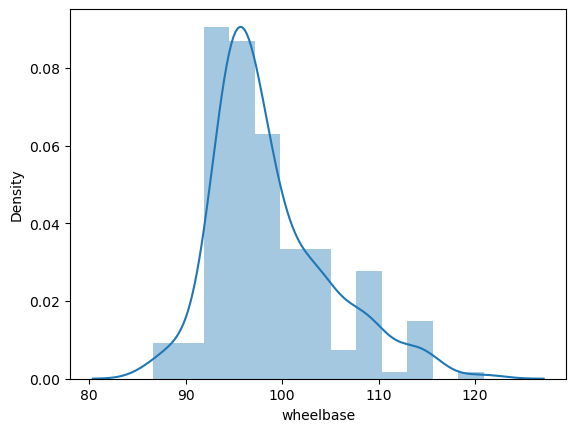

In [12]:
sns.distplot(df['wheelbase'])
plt.show()

In [13]:

df['carlength'].value_counts().head()

157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
Name: carlength, dtype: int64

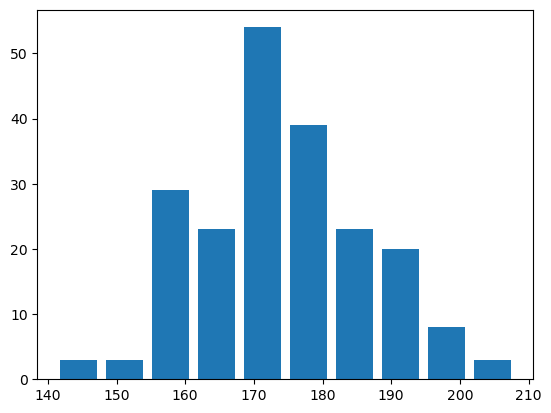

In [14]:

plt.hist(df["carlength"], bins=10, rwidth=0.8)
plt.show()

In [15]:
#now we plot the data that's numeric type
cars_numeric = df.select_dtypes(include =['int64','float64'])
cars_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


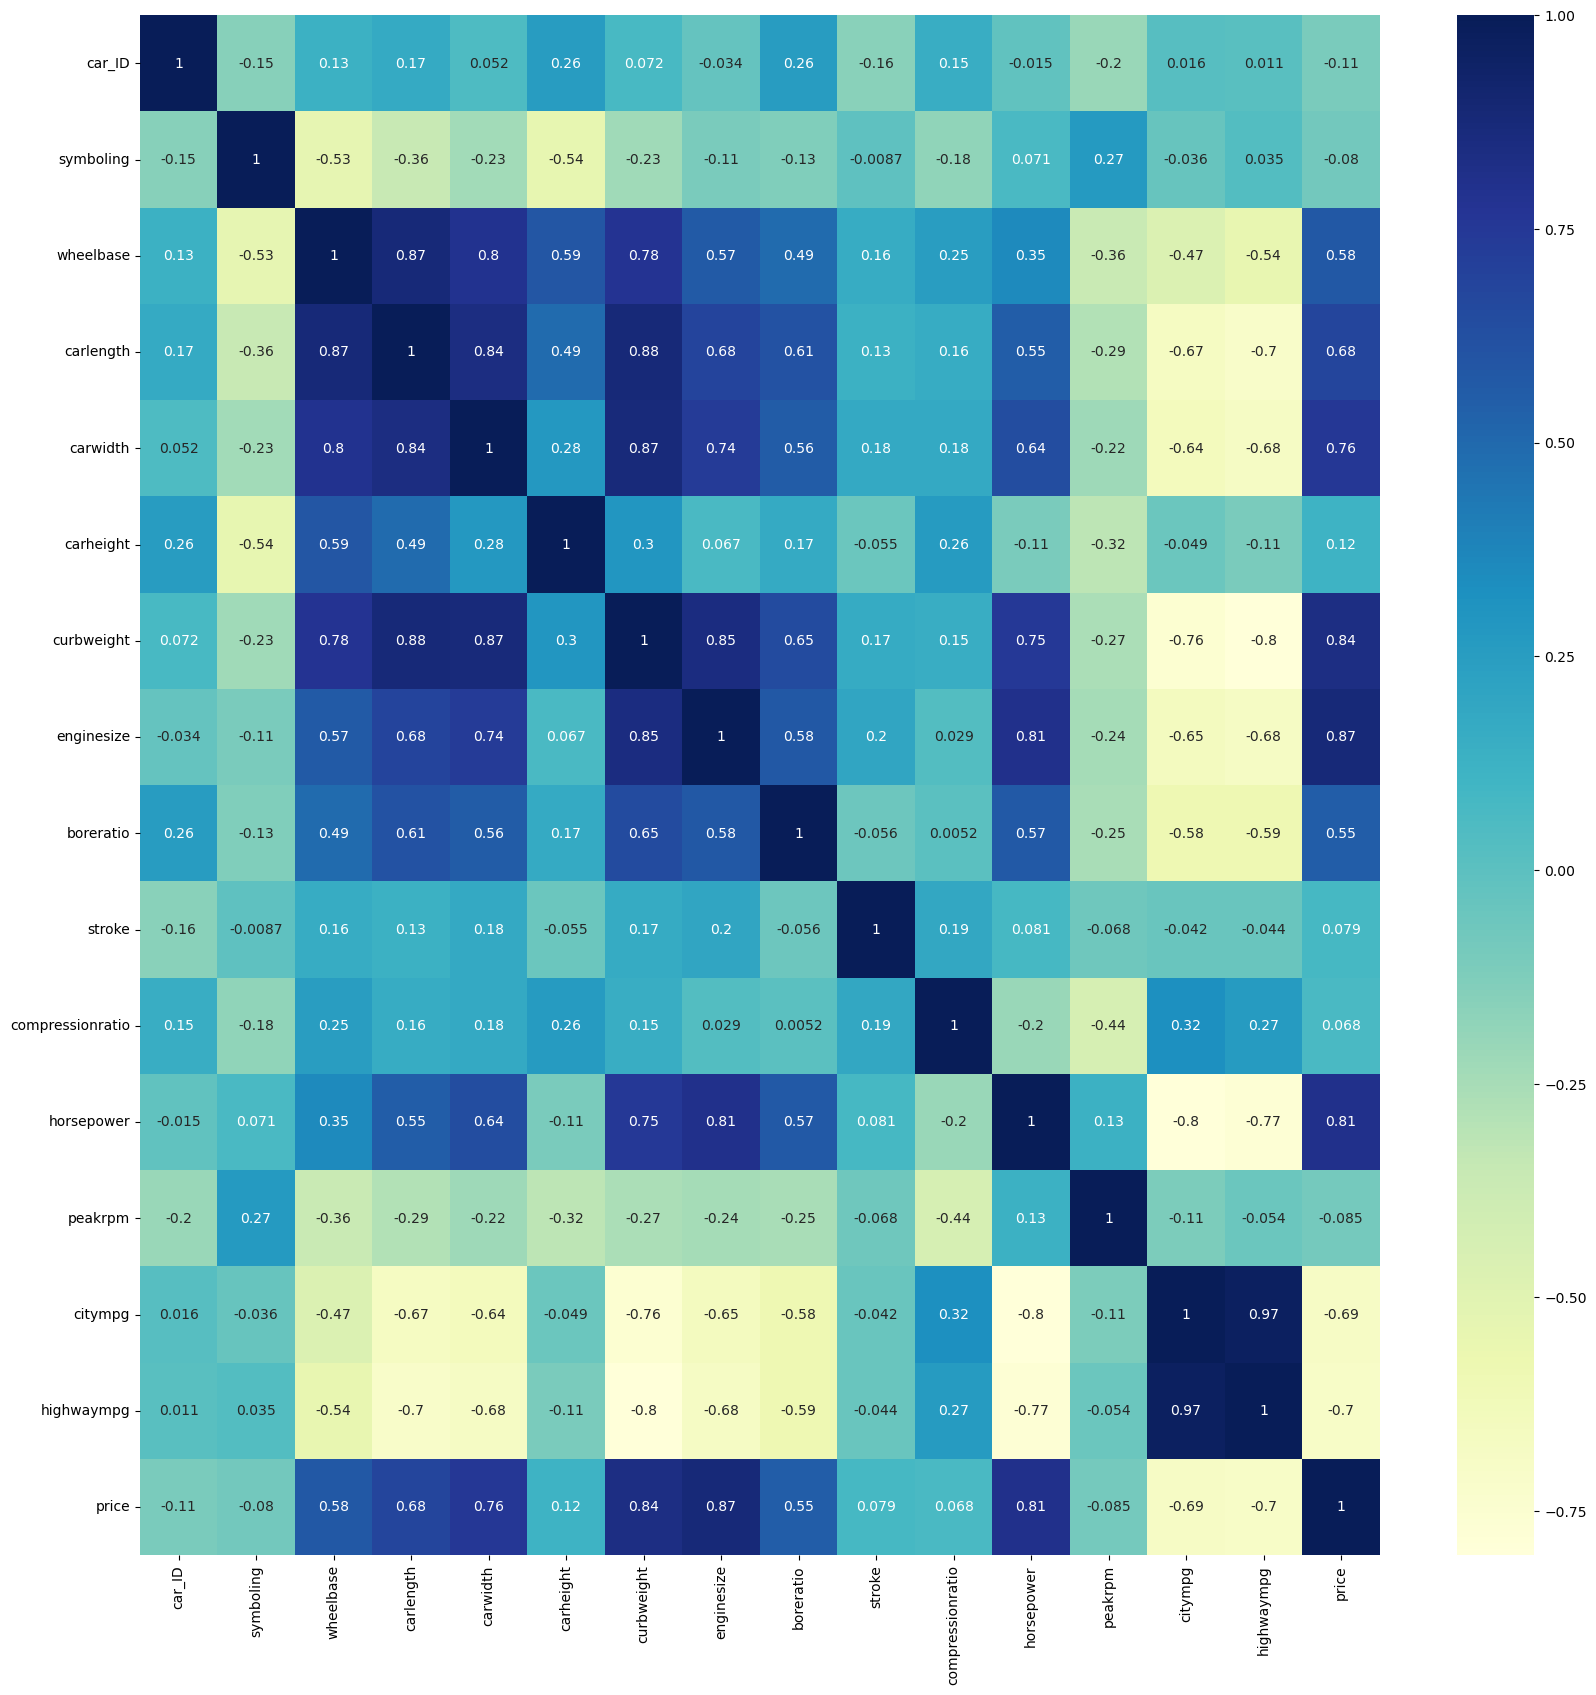

In [16]:
#Now, to plot this data
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

In [22]:
#Creating Dummies

categorical_cols = df.select_dtypes(include=['object'])
categorical_cols.head()
cars_dummies = pd.get_dummies(df[categorical_cols.columns])

car_df = pd.concat([df, cars_dummies], axis=1)
car_df = car_df.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
'enginetype', 'fuelsystem', 'car_company'], axis=1)

car_df.head()


,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,3,two,88.6,168.8,64.1,48.8,2548,four,130,...,0,0,0,0,0,0,0,0,0,0
1,2,3,two,88.6,168.8,64.1,48.8,2548,four,130,...,0,0,0,0,0,0,0,0,0,0
2,3,1,two,94.5,171.2,65.5,52.4,2823,six,152,...,0,0,0,0,0,0,0,0,0,0
3,4,2,four,99.8,176.6,66.2,54.3,2337,four,109,...,0,0,0,0,0,0,0,0,0,0
4,5,2,four,99.4,176.6,66.4,54.3,2824,five,136,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Split into test/train
car_df=car_df.drop("cylindernumber",axis=1)
car_df.fillna(method="ffill")

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,3,two,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,2,3,two,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,3,1,two,94.5,171.2,65.5,52.4,2823,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,4,2,four,99.8,176.6,66.2,54.3,2337,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,5,2,four,99.4,176.6,66.4,54.3,2824,136,3.19,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,four,109.1,188.8,68.9,55.5,2952,141,3.78,...,0,0,0,0,0,0,0,0,0,1
201,202,-1,four,109.1,188.8,68.8,55.5,3049,141,3.78,...,0,0,0,0,0,0,0,0,0,1
202,203,-1,four,109.1,188.8,68.9,55.5,3012,173,3.58,...,0,0,0,0,0,0,0,0,0,1
203,204,-1,four,109.1,188.8,68.9,55.5,3217,145,3.01,...,0,0,0,0,0,0,0,0,0,1


In [24]:
#Checking numeric columns
cars_numeric.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [30]:
df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
#Model

y_train = df_train.pop('price')
X_train = df_train

In [39]:
y_train.shape
X_train.shape

(143, 76)